# 3. Machine Learning for Classification

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [113]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
!wget $data -O data-week-3.csv 

--2025-10-07 10:48:52--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K   710KB/s    in 1.3s    

2025-10-07 10:48:54 (710 KB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [110]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [112]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [113]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [114]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [115]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce') # convert the column values to numbers & ignoring the errors/missing values

In [116]:
df.totalcharges = df.totalcharges.fillna(0)

In [117]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [118]:
df.churn = (df.churn == 'yes').astype(int)

In [119]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25%FT = 20%T

In [122]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [123]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [124]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [125]:
df_full_train = df_full_train.reset_index(drop=True)

In [126]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [127]:
df_full_train.churn.value_counts(normalize=True) # churn rate in %

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [128]:
global_churn_rate = df_full_train.churn.mean() # = churn rate cuz mean = sum(x)/N. Since x can only take values of 0/1, so CR = n(1s)/N
round(global_churn_rate, 2)

np.float64(0.27)

In [129]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [130]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [131]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [132]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

#### Churn rate

In [133]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [134]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [135]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [136]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

#### RATE DIFFERENCE - large +ve(more likely), large -ve(less likely)

In [137]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [138]:
global_churn - churn_male

np.float64(0.006754520462819769)

In [139]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [140]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [141]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [142]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [143]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

#### Risk ratio - > 1 (more likely), < 1(less likely)

In [144]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [145]:
churn_partner / global_churn

np.float64(0.7594724924338315)

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [146]:
from IPython.display import display

In [147]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information (categorical features)

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [148]:
from sklearn.metrics import mutual_info_score

In [149]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [150]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [151]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [152]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [153]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [154]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Feature importance: Correlation (Numerical Features)

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

* correllation coefficient r such that -1 <= r <= 1

* abs 0-0.2 - low
* abs 0.2-0.5 - moderate
* abs 0.6-1 - strong

In [155]:
df_full_train.tenure.max()

72

In [156]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [157]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [158]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [159]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [160]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [161]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [162]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [163]:
from sklearn.feature_extraction import DictVectorizer

In [164]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6}]

In [165]:
dv = DictVectorizer(sparse=False)

In [166]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [167]:
dv.transform(dicts) # Tranformation into feature matrix. Both operations can be combined as fit_transform

array([[ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  1.,  0.,  6.]])

In [168]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=two_year', 'gender=female',
       'gender=male', 'tenure'], dtype=object)

In [169]:
dv = DictVectorizer(sparse=False) # categorical features dominated data would have sparse data - data with lot of zeros

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# val data set does not require fitting
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic regression

* Relevant to binary classification
* Linear vs logistic regression

In [170]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [171]:
z = np.linspace(-7, 7, 51)

In [172]:
sigmoid(10000)

np.float64(1.0)

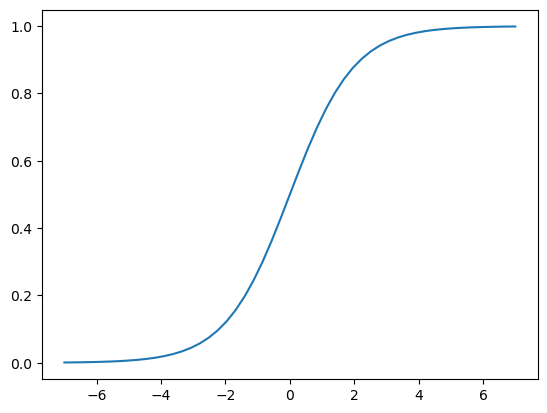

In [173]:
plt.plot(z, sigmoid(z))

In [174]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [175]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [176]:
from sklearn.linear_model import LogisticRegression

In [179]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [180]:
model.intercept_[0]

np.float64(-0.04666441801642448)

In [181]:
model.coef_[0].round(3)

array([ 0.684,  0.037, -0.683,  0.054, -0.015,  0.112, -0.159,  0.086,
        0.038, -0.   , -0.496,  0.694, -0.159, -0.018, -0.188,  0.068,
        0.159,  0.116, -0.159,  0.082,  0.283, -0.159, -0.086, -0.162,
        0.201, -0.044,  0.083, -0.054, -0.005,  0.107, -0.011,  0.068,
       -0.03 ,  0.193, -0.094, -0.159,  0.292, -0.055, -0.159,  0.252,
        0.233, -0.159, -0.036, -0.068,  0.   ])

In [182]:
model.predict(X_train) # hard predictions - only 0 and 1

array([0, 1, 1, ..., 1, 0, 1])

In [183]:
model.predict_proba(X_train) # soft predictions - Pr values [Pr(-ve), Pr(+ve)]

array([[0.92703675, 0.07296325],
       [0.32391394, 0.67608606],
       [0.36930062, 0.63069938],
       ...,
       [0.48790166, 0.51209834],
       [0.97450183, 0.02549817],
       [0.30603104, 0.69396896]])

In [184]:
y_pred = model.predict_proba(X_val)[:, 1]

In [185]:
churn_decision = (y_pred >= 0.5) # return a matrix of boolean values

In [186]:
df_val[churn_decision].customerid # customers that should receive promotional email or discounts

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 314, dtype: object

In [187]:
# CHECK MODEL ACCURACY

In [188]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [189]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [190]:
(y_val == churn_decision).mean()

np.float64(0.8041163946061036)

In [191]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [192]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [193]:
df_pred

,probability,prediction,actual,correct
0,0.006635,0,0,True
1,0.205166,0,0,True
2,0.217836,0,0,True
3,0.564267,1,1,True
4,0.218417,0,0,True
...,...,...,...,...
1404,0.292126,0,0,True
1405,0.041301,0,1,False
1406,0.151443,0,0,True
1407,0.788887,1,1,True


In [194]:
df_pred.correct.mean()

np.float64(0.8041163946061036)

In [195]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [196]:
a = [1, 2, 3, 4]
b = 'abcd'

In [197]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [198]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [199]:
model.coef_[0].round(3)

array([ 0.684,  0.037, -0.683,  0.054, -0.015,  0.112, -0.159,  0.086,
        0.038, -0.   , -0.496,  0.694, -0.159, -0.018, -0.188,  0.068,
        0.159,  0.116, -0.159,  0.082,  0.283, -0.159, -0.086, -0.162,
        0.201, -0.044,  0.083, -0.054, -0.005,  0.107, -0.011,  0.068,
       -0.03 ,  0.193, -0.094, -0.159,  0.292, -0.055, -0.159,  0.252,
        0.233, -0.159, -0.036, -0.068,  0.   ])

In [200]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.684),
 'contract=one_year': np.float64(0.037),
 'contract=two_year': np.float64(-0.683),
 'dependents=no': np.float64(0.054),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.112),
 'deviceprotection=no_internet_service': np.float64(-0.159),
 'deviceprotection=yes': np.float64(0.086),
 'gender=female': np.float64(0.038),
 'gender=male': np.float64(-0.0),
 'internetservice=dsl': np.float64(-0.496),
 'internetservice=fiber_optic': np.float64(0.694),
 'internetservice=no': np.float64(-0.159),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.188),
 'multiplelines=no_phone_service': np.float64(0.068),
 'multiplelines=yes': np.float64(0.159),
 'onlinebackup=no': np.float64(0.116),
 'onlinebackup=no_internet_service': np.float64(-0.159),
 'onlinebackup=yes': np.float64(0.082),
 'onlinesecurity=no': np.float64(0.283),
 'onlinesecurity=no_internet_service': np.float64(-0.159),
 'onlinesecurity=yes': np.

In [201]:
small = ['contract', 'tenure', 'monthlycharges']

In [202]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [203]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [204]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [205]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [206]:
X_train_small = dv_small.transform(dicts_train_small)

In [207]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [208]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575955748054)

In [209]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [210]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [211]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [212]:
sigmoid(-3.473) # sigmoid(_)

np.float64(0.030090303318277657)

## 3.12 Using the model

In [219]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [220]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [221]:
y_full_train = df_full_train.churn.values

In [222]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [223]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [224]:
X_test = dv.transform(dicts_test)

In [225]:
y_pred = model.predict_proba(X_test)[:, 1]

In [226]:
churn_decision = (y_pred >= 0.5)

In [227]:
(churn_decision == y_test).mean()

np.float64(0.8119233498935415)

In [228]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [229]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [230]:
X_small = dv.transform([customer])

In [231]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6385552799869791)

In [232]:
y_test[-1]

np.int64(1)

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

